<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
from sklearn.datasets import load_boston
boston=load_boston()


In [0]:
X=pd.DataFrame(boston.data,columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
y=pd.DataFrame(boston.target,columns=['target'])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [0]:
model=Sequential()
model.add(Dense(128,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(28,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear',kernel_initializer='uniform'))

In [0]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [0]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2,batch_size=10)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

33/33 [==============================] - 0s 8ms/step - loss: 585.7471 - mse: 585.7471 - val_loss: 676.5968 - val_mse: 676.5968
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 570.8610 - mse: 570.8610 - val_loss: 631.7268 - val_mse: 631.7268
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 442.1330 - mse: 442.1330 - val_loss: 357.2338 - val_mse: 357.2338
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 183.5493 - mse: 18

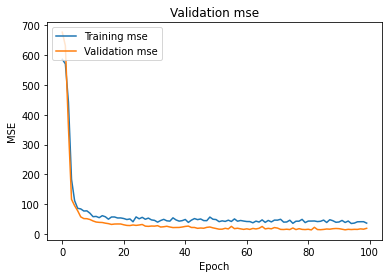

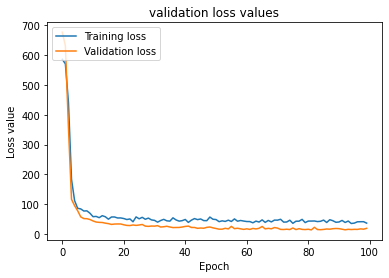

In [0]:
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.title('Validation mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [0]:
y_pred=model.predict(x_test)
y_pred

array([[21.225466 ],
       [20.49743  ],
       [23.989542 ],
       [21.182608 ],
       [36.94086  ],
       [12.4192   ],
       [22.52743  ],
       [31.437431 ],
       [20.668257 ],
       [20.112984 ],
       [14.181163 ],
       [21.632206 ],
       [30.767595 ],
       [16.090302 ],
       [18.509745 ],
       [18.355875 ],
       [16.509119 ],
       [19.225107 ],
       [16.238377 ],
       [ 7.935035 ],
       [16.589695 ],
       [22.767508 ],
       [17.024033 ],
       [23.360184 ],
       [12.459712 ],
       [17.196825 ],
       [18.999842 ],
       [31.779884 ],
       [31.940802 ],
       [13.333133 ],
       [23.168116 ],
       [13.600472 ],
       [28.819502 ],
       [24.685392 ],
       [30.412453 ],
       [18.808706 ],
       [17.378778 ],
       [16.019547 ],
       [13.279007 ],
       [11.911057 ],
       [12.804347 ],
       [13.350579 ],
       [20.133417 ],
       [35.45928  ],
       [18.329493 ],
       [20.71076  ],
       [19.965038 ],
       [21.57

In [0]:
score=model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 13.9595 - mse: 13.9595


In [0]:
score

[13.959490776062012, 13.959490776062012]